In [32]:
#1. Reproduce the complete workbook over colab and give screen shot of that before class end (3:15)
#2. Try predicting "D"



#Input Data
# A 
a =[0, 0, 1, 1, 0, 0, 
0, 1, 0, 0, 1, 0, 
1, 1, 1, 1, 1, 1, 
1, 0, 0, 0, 0, 1, 
1, 0, 0, 0, 0, 1] 
# B 
b =[0, 1, 1, 1, 1, 0, 
0, 1, 0, 0, 1, 0, 
0, 1, 1, 1, 1, 0, 
0, 1, 0, 0, 1, 0, 
0, 1, 1, 1, 1, 0] 
# C 
c =[0, 1, 1, 1, 1, 0, 
    0, 1, 0, 0, 0, 0, 
    0, 1, 0, 0, 0, 0, 
    0, 1, 0, 0, 0, 0,  
    0, 1, 1, 1, 1, 0] 

# d = [] 5 x 6
d =[0, 1, 1, 1, 1, 0, 
    0, 1, 0, 0, 0, 1, 
    0, 1, 0, 0, 0, 1, 
    0, 1, 0, 0, 0, 1,  
    0, 1, 1, 1, 1, 0] 


# Creating labels 
y =[[1, 0, 0], 
[0, 1, 0], 
[0, 0, 1]] 


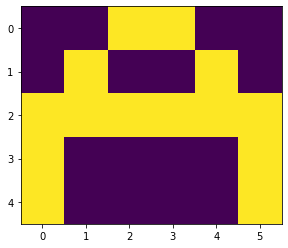

In [33]:
#Checking & Visualization
import numpy as np 
import matplotlib.pyplot as plt 
# visualizing the data, ploting A. 
plt.imshow(np.array(a).reshape(5, 6)) 
plt.show() 


In [34]:
# converting data and labels into numpy array 

""" 
Convert the matrix of 0 and 1 into one hot vector 
so that we can directly feed it to the neural network, 
these vectors are then stored in a list x. 
"""

x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30), np.array(d).reshape(1, 30)] 


# Labels are also converted into NumPy array 
y = np.array(y) 


print(x, "\n\n", y)


[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
        0, 1, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [35]:



# def testmycode:
#     serial block of code:
        
        
        
        
        
#         ////
#     parallel block of code:
        
        
#         ///
        

# f = pb
# (1-f) = sb













# activation function 

def sigmoid(x): 
	return(1/(1 + np.exp(-x))) 
	
# Creating the Feed forward neural network 
# 1 Input layer(1, 30) 
# 1 hidden layer (1, 5) 
# 1 output layer(3, 3) 

def f_forward(x, w1, w2): 
	# hidden 
	z1 = x.dot(w1)# input from layer 1  
                                        # z1 = x.dot(w1) x = input, w1 = weights 
                                        # np.dot(x, w1) x=input, w1=weights, np.dot(self.input, self.weights1))
	a1 = sigmoid(z1)# out put of layer 2 
	
    # a1 = sigmoid(x.dot(w1))

    # Output layer 
	z2 = a1.dot(w2)# input of out layer 
	a2 = sigmoid(z2)# output of out layer 
	return(a2) 

# initializing the weights randomly 
def generate_wt(x, y): 
	l =[] 
	for i in range(x * y): #for i in range (10): 1-- 9 values i generate 
		l.append(np.random.randn()) 
	return(np.array(l).reshape(x, y)) 
	
# for loss we will be using mean square error(MSE) 
def loss(out, Y): 
	s =(np.square(out-Y)) #difference
	s = np.sum(s)/len(y) # sum /12 total count
	return(s) 
	
# Back propagation of error 
def back_prop(x, y, w1, w2, alpha): 
	
	# hiden layer 
	z1 = x.dot(w1)# input from layer 1 
	a1 = sigmoid(z1)# output of layer 2 
	
	# Output layer 
	z2 = a1.dot(w2)# input of out layer 
	a2 = sigmoid(z2)# output of out layer 
	# error in output layer 
	d2 =(a2-y) 
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(), 
								(np.multiply(a1, 1-a1))) 

	# Gradient for w1 and w2 
	w1_adj = x.transpose().dot(d1) 
	w2_adj = a1.transpose().dot(d2) 
	
	# Updating parameters 
	w1 = w1-(alpha*(w1_adj)) 
	w2 = w2-(alpha*(w2_adj)) 
	
	return(w1, w2) 

def train(x, Y, w1, w2, alpha = 0.01, epoch = 10): 
	acc =[] 
	losss =[] 
	for j in range(epoch): 
		l =[] 
		for i in range(len(x)): 
			out = f_forward(x[i], w1, w2) 
			l.append((loss(out, Y[i]))) 
			w1, w2 = back_prop(x[i], y[i], w1, w2, alpha) 
		print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100) 
		acc.append((1-(sum(l)/len(x)))*100) 
		losss.append(sum(l)/len(x)) 
	return(acc, losss, w1, w2) 

def predict(x, w1, w2): 
	Out = f_forward(x, w1, w2) 
	maxm = 0
	k = 0
	for i in range(len(Out[0])): 
		if(maxm<Out[0][i]): 
			maxm = Out[0][i] 
			k = i 
	if(k == 0): 
		print("Image is of letter A.") 
	elif(k == 1): 
		print("Image is of letter B.") 
	else: 
		print("Image is of letter C.") 
	plt.imshow(x.reshape(5, 6)) 
	plt.show()	 
	



In [36]:
w1 = generate_wt(30, 5) 
w2 = generate_wt(5, 3) 
print(w1, "\n\n", w2)


[[-0.71833312  0.99700246 -0.16416276 -0.31029553  0.15736284]
 [-1.06818549 -0.76355691  0.36217788 -1.22426146 -0.64099753]
 [ 1.28424682  1.29085096  0.16298641  0.5076552  -0.24416836]
 [-0.0924373   0.68980136 -0.18004428 -0.0164369  -0.22173551]
 [-0.0253359  -0.41098044 -1.42757716  0.46935014  2.16631617]
 [-0.13142206 -0.01766859  0.98037862  0.34012284  0.90884785]
 [ 0.67303671  0.72082066 -0.07017866 -0.75891867  0.44068957]
 [ 1.03047602  1.28787456  1.04058229  1.4073015   0.0318249 ]
 [-0.67094913  0.05744504 -0.55692811  0.7371808  -2.15602314]
 [ 1.22345021 -0.04554701 -0.11038902 -0.58662028 -0.46067156]
 [-0.78900155  0.75877827 -0.646167   -1.78660724 -0.4068634 ]
 [ 1.49766988 -1.59274095  1.20070729  0.6183296  -0.71180858]
 [ 1.87465676 -0.23285958 -0.86400974  0.69832175  0.03526254]
 [ 1.16340951  0.55002073 -1.50654884 -0.67561631 -0.83478339]
 [ 0.22089357 -0.76176359  0.24830693  0.7663118  -1.32463728]
 [ 0.86990764 -0.32129463  0.38706709 -1.25790495 -1.60

In [37]:
"""The arguments of train function are data set list x, 
correct labels y, weights w1, w2, learning rate = 0.1, 
no of epochs or iteration.The function will return the 
matrix of accuracy and loss and also the matrix of 
trained weights w1, w2"""

acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)


epochs: 1 ======== acc: 75.93221251994139
epochs: 2 ======== acc: 76.57843142223471
epochs: 3 ======== acc: 77.14688066311189
epochs: 4 ======== acc: 77.63172511126866
epochs: 5 ======== acc: 78.04481173583349
epochs: 6 ======== acc: 78.40684812858242
epochs: 7 ======== acc: 78.73736287724444
epochs: 8 ======== acc: 79.05145411916504
epochs: 9 ======== acc: 79.36029453844849
epochs: 10 ======== acc: 79.67237614294166
epochs: 11 ======== acc: 79.99441460189526
epochs: 12 ======== acc: 80.33169102313765
epochs: 13 ======== acc: 80.68783861397101
epochs: 14 ======== acc: 81.0642085951967
epochs: 15 ======== acc: 81.45918032859967
epochs: 16 ======== acc: 81.8680236977454
epochs: 17 ======== acc: 82.28380878404616
epochs: 18 ======== acc: 82.69917305561498
epochs: 19 ======== acc: 83.10804156746549
epochs: 20 ======== acc: 83.50647671254482
epochs: 21 ======== acc: 83.89258041490635
epochs: 22 ======== acc: 84.26591062929984
epochs: 23 ======== acc: 84.62686101972282
epochs: 24 ======== ac

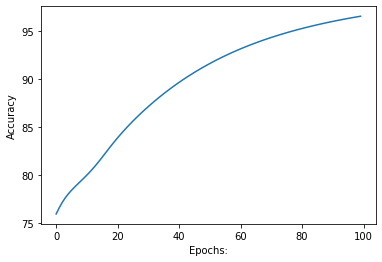

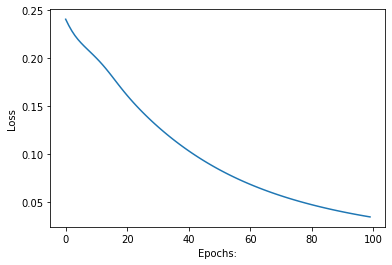

In [38]:
import matplotlib.pyplot as plt1 

# ploting accuraccy 
plt1.plot(acc) 
plt1.ylabel('Accuracy') 
plt1.xlabel("Epochs:") 
plt1.show() 

# plotting Loss 
plt1.plot(losss) 
plt1.ylabel('Loss') 
plt1.xlabel("Epochs:") 
plt1.show()


In [39]:
# the trained weigths are 
print(w1, "\n", w2)


[[-7.18333116e-01  9.97002460e-01 -1.64162756e-01 -3.10295525e-01
   1.57362837e-01]
 [-1.55775673e+00 -8.88874933e-01  2.25227333e-01 -1.25248657e+00
  -3.15202226e-01]
 [ 9.93633824e-01  1.16392281e+00  3.16890562e-02  4.79330595e-01
   1.18245458e-01]
 [-3.83050296e-01  5.62873213e-01 -3.11341638e-01 -4.47615041e-02
   1.40678308e-01]
 [-5.14907144e-01 -5.36298464e-01 -1.56452771e+00  4.41125030e-01
   2.49211147e+00]
 [-1.31422057e-01 -1.76685945e-02  9.80378616e-01  3.40122841e-01
   9.08847854e-01]
 [ 6.73036706e-01  7.20820656e-01 -7.01786562e-02 -7.58918666e-01
   4.40689566e-01]
 [ 7.39863020e-01  1.16094642e+00  9.09284941e-01  1.37897689e+00
   3.94238719e-01]
 [-6.70949134e-01  5.74450359e-02 -5.56928110e-01  7.37180803e-01
  -2.15602314e+00]
 [ 1.22345021e+00 -4.55470107e-02 -1.10389015e-01 -5.86620281e-01
  -4.60671558e-01]
 [-7.13056543e-01  9.36730101e-01 -6.89993393e-01 -1.78310859e+00
  -7.06640693e-01]
 [ 1.13111188e+00 -1.89762093e+00  1.11323633e+00  5.86506348e-01

Image is of letter C.


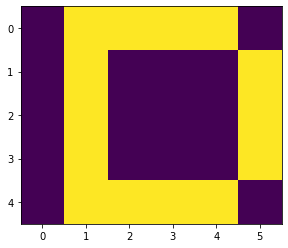

In [40]:
""" 
The predict function will take the following arguments: 
1) image matrix 
2) w1 trained weights 
3) w2 trained weights 
"""
predict(x[2], w1, w2)
